***Mona Abdu Mohammed***

***Customer Shopping Analysis:***


The primary objective of this analysis is to understand customer behavior and purchasing trends based on the provided data to enable strategic decision-making that improves overall company performance, increases revenue, and enhances customer satisfaction.

We will start with importing the library that we need it in this analysis.

In [1]:
#Importing library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

***Dataset***

In [2]:
#load the data from a CSV file into a dataframe for analysis
m=pd.read_csv("/content/shopping_trends.csv")
m

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


The dataset offers a comprehensive view of consumer shopping trends, aiming to uncover patterns and behaviors in retail purchasing. It contains detailed transactional data across various product categories, customer demographics, and purchase channels. Key features may include:

Transaction Details: Purchase date, transaction value, product category, and payment method.
Customer Information: Age group, gender, location, and loyalty status.
Shopping Behavior: Frequency of purchases, average spend per transaction, and seasonal trends.

***Basic information***

In [3]:
#get an overview of the dataset
m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

***Checked Null value***



In [4]:
#create a dataframe indicating null vale
m.isnull().sum()

,0
Customer ID,0
Age,0
Gender,0
Item Purchased,0
Category,0
Purchase Amount (USD),0
Location,0
Size,0
Color,0
Season,0


***Checking for outliers and illogical values***

<Axes: >

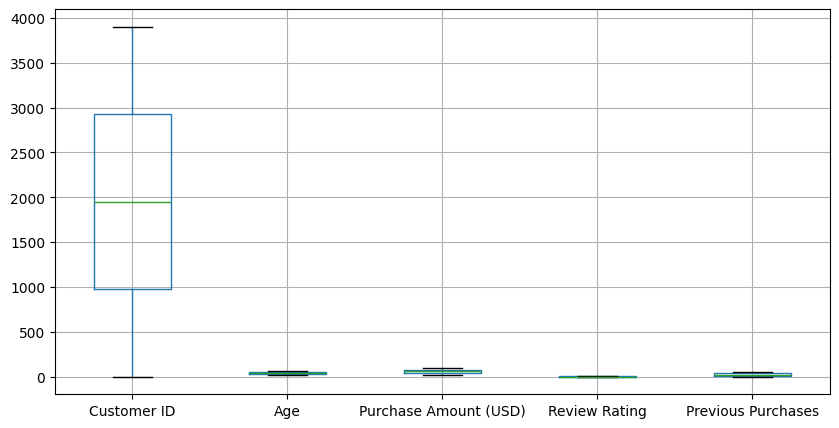

In [9]:
#creating a box plot that summarizes the distribution of the value
plt.figure(figsize=(10,5))
m.boxplot()

From the plot above we notice that there is no outliers and illogical values in the dataframe

***The description of dataset***

In [10]:
#get a statistical summary of the dataset
m.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


***Most Category***

In [11]:
#get counts of each category
category=m['Category'].value_counts()
category

,count
Category,
Clothing,1737
Accessories,1240
Footwear,599
Outerwear,324


***Most Item Purchased***

In [12]:
#get counts of each item purchased
item_purchased=m['Item Purchased'].value_counts()
item_purchased

,count
Item Purchased,
Blouse,171
Jewelry,171
Pants,171
Shirt,169
Dress,166
Sweater,164
Jacket,163
Belt,161
Sunglasses,161


***Cities that buy the most items***

In [13]:
#get count of each location
location=m['Location'].value_counts()
location

,count
Location,
Montana,96
California,95
Idaho,93
Illinois,92
Alabama,89
Minnesota,88
Nebraska,87
New York,87
Nevada,87


***Most color***

In [14]:
#get count of each color
m['Color'].value_counts()

,count
Color,
Olive,177
Yellow,174
Silver,173
Teal,172
Green,169
Black,167
Cyan,166
Violet,166
Gray,159


Number of item purchased for each quarter of the year.

***Item Purchased analysis by Season***

In [15]:
#calculate count of each item purchase by seasons
s=m.groupby('Item Purchased')['Season'].value_counts().unstack(fill_value=0)  #unstack the grouped data to create a pivot table
s


Season,Fall,Spring,Summer,Winter
Item Purchased,,,,
Backpack,34,39,45,25
Belt,41,41,39,40
Blouse,42,46,43,40
Boots,35,40,38,31
Coat,34,46,42,39
Dress,36,43,47,40
Gloves,37,42,29,32
Handbag,48,36,35,34
Hat,50,27,37,40


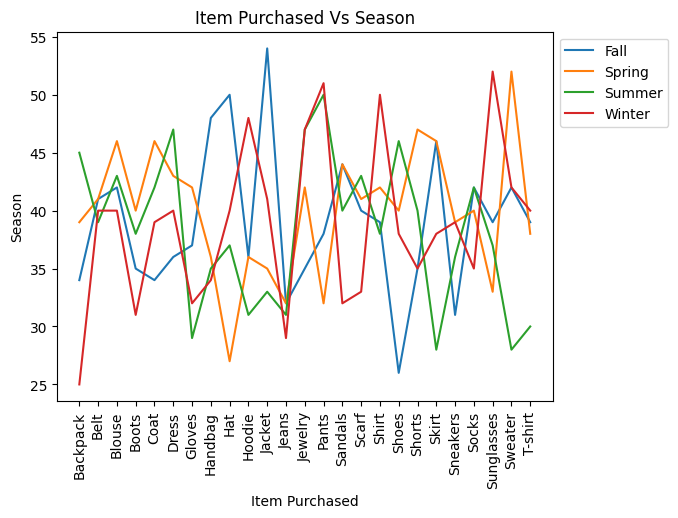

In [16]:
#create a plot to visualize the item purchase by season
plt.plot(s)    #line plot for item purchase by season
plt.xticks(rotation=90)   #rotate x-axis lable for better readability
plt.title('Item Purchased Vs Season')  #setting the title of the plot
plt.xlabel('Item Purchased')   #lable for the x-axis
plt.ylabel('Season')    #lable for the y-axis
plt.legend(s.columns, bbox_to_anchor=(1,1))   #show legend for the plotted data
plt.show()   #display the plot


From the sketch above we note that in winter, sales are expected to rise such as coats and warm  footwear.
In spring, there is a demand for lighter clothing and brighter color.
In summer, there is high demand for summer apparel like shorts and lightweight shirts.
In fall, there is increase in demand for fall clothing such as jackets, as people start preparing for the winter season.



***Sales analysis by Item Purchased***

In [17]:
#calculate total Purchase Amount by Item Purchased
x=m.groupby('Item Purchased')['Purchase Amount (USD)'].sum()
x

,Purchase Amount (USD)
Item Purchased,
Backpack,8636
Belt,9635
Blouse,10410
Boots,9018
Coat,9275
Dress,10320
Gloves,8477
Handbag,8857
Hat,9375


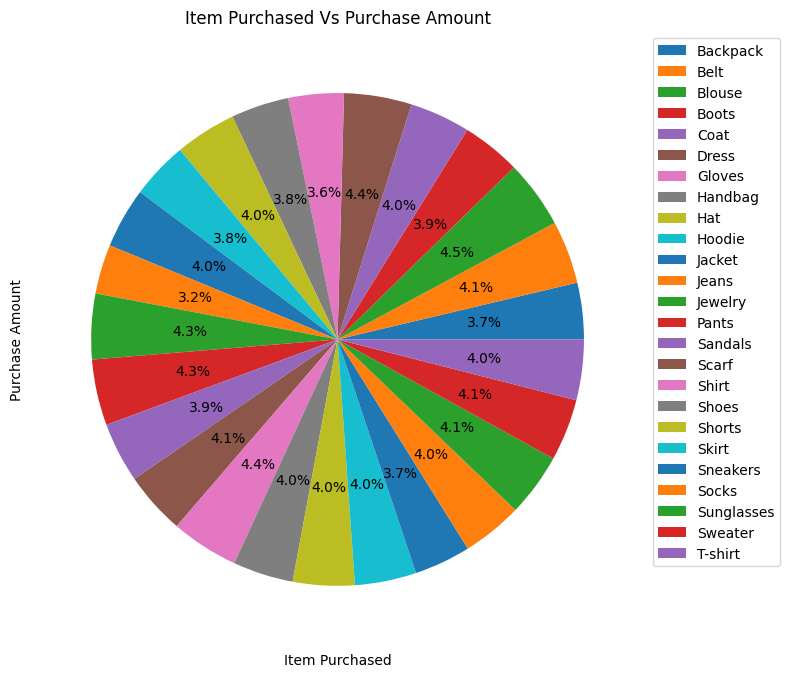

In [18]:
#create a plot to visualize the Purchase Amount by Item Purchased
plt.figure(figsize=(8,8))   #set the figure size  to 8*8 inches
y=x.values/x.values.sum()*100   #calculate percentage of the values
plt.pie(y,autopct='%1.1f%%')     #pie chart for Purchase Amount by Item Purchased
plt.title('Item Purchased Vs Purchase Amount')   #setting the title of the plot
plt.xlabel('Item Purchased')   #lable for the x-axis
plt.ylabel('Purchase Amount')   #lable for the y-axis
plt.legend(x.index, bbox_to_anchor=(1,1)) #show legend for the plotted data
plt.show()    #display the plot

From the figure above we note that the purchase amount for each item is close.

***Salse analysis by Location***

In [19]:
#calculate total Purchase Amount by location
z=m.groupby('Location')['Purchase Amount (USD)'].sum()
z

,Purchase Amount (USD)
Location,
Alabama,5261
Alaska,4867
Arizona,4326
Arkansas,4828
California,5605
Colorado,4222
Connecticut,4226
Delaware,4758
Florida,3798


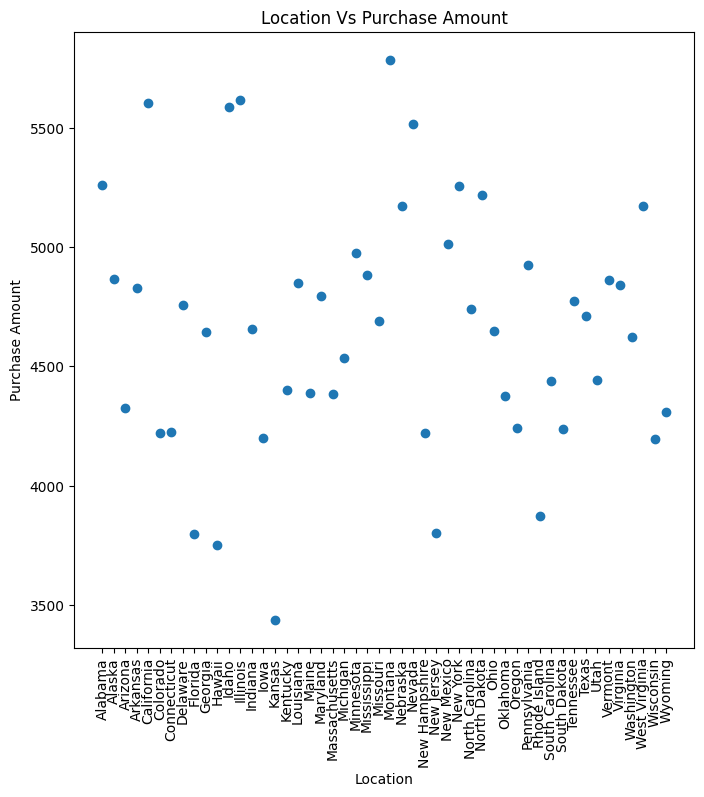

In [20]:
#create a plot to visualize the Purchase Amount by location
plt.figure(figsize=(8,8))  #set the figure size  to 8*8 inches
plt.scatter(z.index,z.values)   #scatter plot for Purchase Amount by location
plt.xticks(rotation=90)  #rotate x-axis lable for better readability
plt.title('Location Vs Purchase Amount')  #setting the title of the plot
plt.xlabel('Location')  #lable for the x-axis
plt.ylabel('Purchase Amount')  #lable for the y-axis
plt.show()  #display the plot

From figure above we note that, the city that buys the most items is Montana, followed by Illinois.

***Frequency of Purchases analysis by Item Purchased***

In [21]:
#calculate count of each item purchase by Frequency of Purchases
a=m.groupby('Item Purchased')['Frequency of Purchases'].value_counts().unstack(fill_value=0) #unstack the grouped data to create a pivot table
a

Frequency of Purchases,Annually,Bi-Weekly,Every 3 Months,Fortnightly,Monthly,Quarterly,Weekly
Item Purchased,,,,,,,
Backpack,22,21,23,22,11,21,23
Belt,24,24,27,19,23,22,22
Blouse,32,31,31,20,15,25,17
Boots,15,23,19,25,8,31,23
Coat,23,20,18,27,20,27,26
Dress,31,20,28,20,27,17,23
Gloves,22,23,16,21,20,19,19
Handbag,21,20,31,21,26,19,15
Hat,21,17,20,19,29,29,19


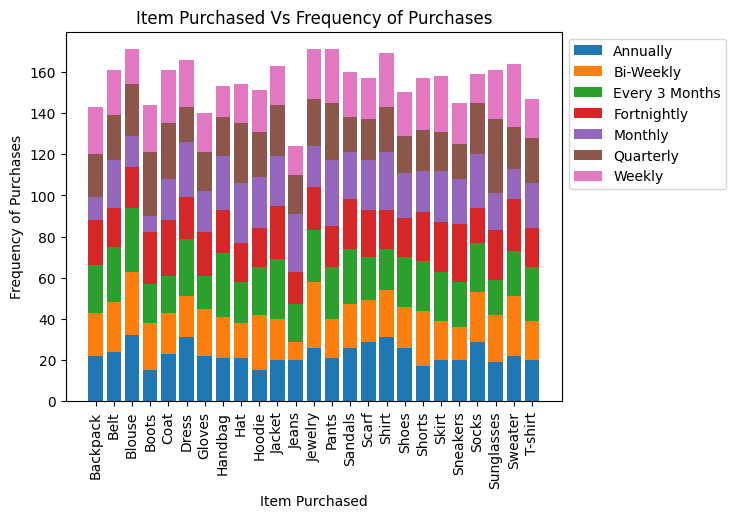

In [22]:
#create a plot to visualize the Purchase Amount by location
frequency_counts = a.values.T  #transpose the value of the a dataframe
for i, col in enumerate(a.columns):  #output the index and name of each column
    plt.bar(a.index, frequency_counts[i], label=col,bottom=np.sum(frequency_counts[:i], axis=0))  #bar chart for Purchase Amount by location

plt.xticks(rotation=90)  #rotate x-axis lable for better readability
plt.title('Item Purchased Vs Frequency of Purchases')  #setting the title of the plot
plt.xlabel('Item Purchased')  #lable for the x-axis
plt.ylabel('Frequency of Purchases')  #lable for the y-axis
plt.legend(a.columns, bbox_to_anchor=(1,1))  #show legend for the plotted data
plt.show()  #display the plot

The most items that the customers purchase frequently are blouse, jewelry, pants, and shirts.

***Sales analysis by Category***

In [23]:
#calculate total Purchase Amount by category
b=m.groupby('Category')['Purchase Amount (USD)'].sum()
b

,Purchase Amount (USD)
Category,
Accessories,74200
Clothing,104264
Footwear,36093
Outerwear,18524


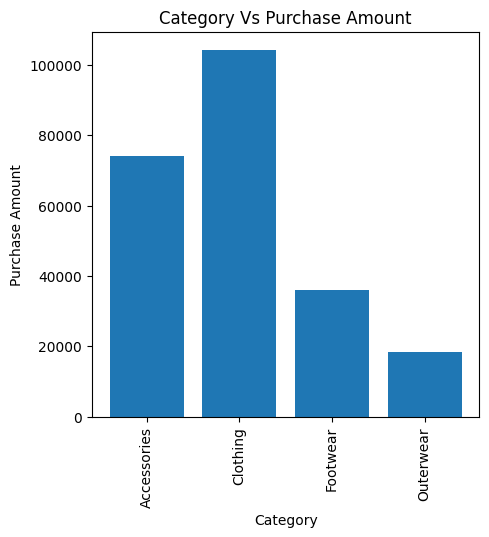

In [24]:
#create a plot to visualize the Purchase Amount by category
plt.figure(figsize=(5,5)) #set the figure size  to 5*5 inches
plt.bar(b.index,b.values)  #bar chart for Purchase Amount by category
plt.xticks(rotation=90) #rotate x-axis lable for better readability
plt.title('Category Vs Purchase Amount')  #setting the title of the plot
plt.xlabel('Category')  #lable for the x-axis
plt.ylabel('Purchase Amount')  #lable for the y-axis
plt.show()  #display the plot

The most category that the customers purchase is clothing,reflecting a strong preference for apparel. Followed by accessories, indicating that customers spend significant amounts on accessories. Footwear and outerwear also contribute to sales but at lower amount.

***Sales analysis by Age***

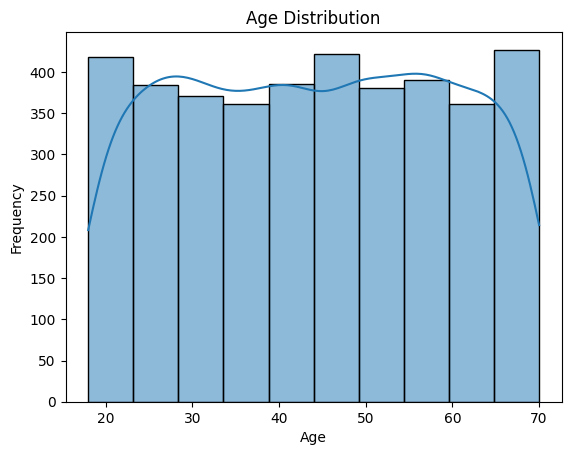

In [25]:
#create a plot to visualize the age
sns.histplot(m['Age'],bins=10,kde=True) #histogram with density estimation
plt.title('Age Distribution')  #setting the title of the plot
plt.xlabel('Age')  #lable for the x-axis
plt.ylabel('Frequency')  #lable for the y-axis
plt.show()  #display the plot

Customers aged 30-50 are highest spender.Focused promotions and targeted campaigns can help maximize engagement and sales within this group.

In [26]:
#calculate total Purchase Amount by gender
c=m.groupby('Gender')['Purchase Amount (USD)'].sum()
c

,Purchase Amount (USD)
Gender,
Female,75191
Male,157890


***Sales analysis by Gender***

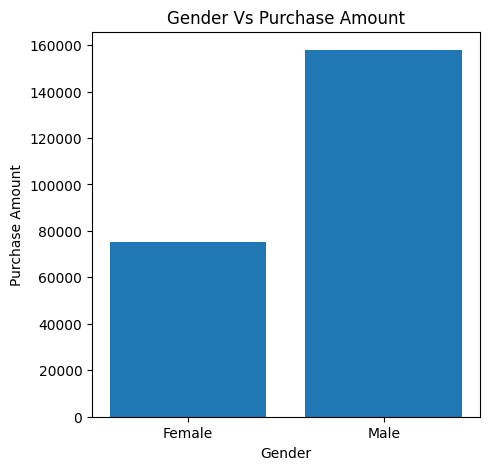

In [27]:
#create a plot to visualize the Purchase Amount by gender
plt.figure(figsize=(5,5)) #set the figure size  to 5*5 inches
plt.bar(c.index,c.values) #bar chart for Purchase Amount by gender
plt.title('Gender Vs Purchase Amount') #setting the title of the plot
plt.xlabel('Gender') #lable for the x-axis
plt.ylabel('Purchase Amount') #lable for the y-axis
plt.show() #display the plot

It turned out that of those who made the purchase were males compared to female customer!!

***Review Rating analysis by Category***

In [28]:
#calculate average Review Rating by Category
d=m.groupby('Category')['Review Rating'].mean()
d

,Review Rating
Category,
Accessories,3.768629
Clothing,3.723143
Footwear,3.790651
Outerwear,3.746914


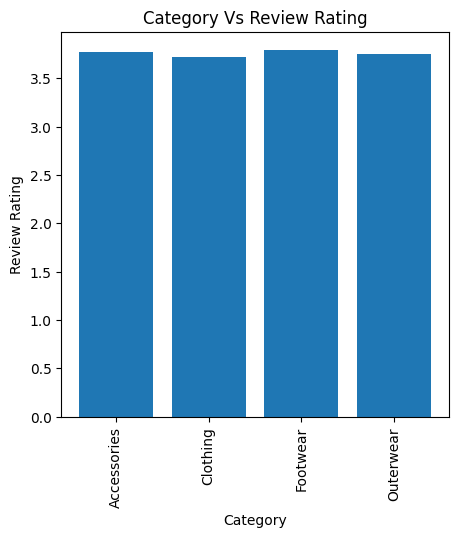

In [29]:
#create a plot to visualize the Review Rating by Category
plt.figure(figsize=(5,5)) #set the figure size  to 5*5 inches
plt.bar(d.index,d.values) #bar chart for Review Rating by Category
plt.xticks(rotation=90)  #rotate x-axis lable for better readability
plt.title('Category Vs Review Rating') #setting the title of the plot
plt.xlabel('Category') #lable for the x-axis
plt.ylabel('Review Rating') #lable for the y-axis
plt.show() #display the plot

Most rating are concentrated between 3 and 4.5, indicating overall customer satisfaction.
Rating bellow 3 are rare and may reflact occasional negative feedback.

***Sales analysis by Shipping Type***

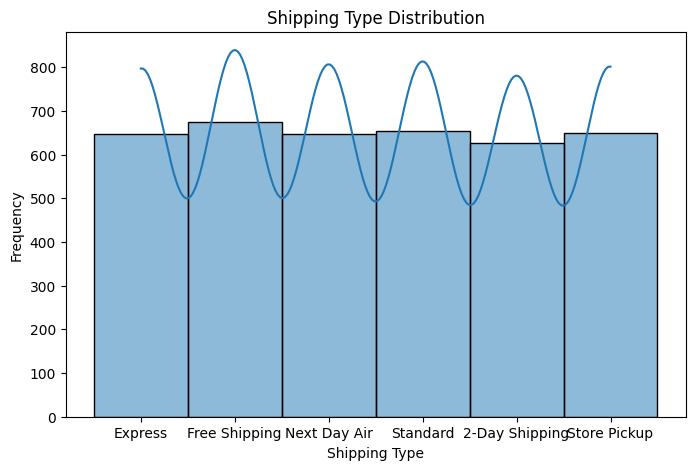

In [30]:
#create a plot to visualize the Shipping Type
plt.figure(figsize=(8,5)) #set the figure size  to 8*5 inches
sns.histplot(m['Shipping Type'],bins=10,kde=True) #histogram with density estimation
plt.title('Shipping Type Distribution') #setting the title of the plot
plt.xlabel('Shipping Type') #lable for the x-axis
plt.ylabel('Frequency') #lable for the y-axis
plt.show()  #display the plot

Free shipping is a popular choice among customers.

***Sales analysis by Subsription Status***

In [31]:
#calculate total Purchase Amount by Subscription Status
sub=m.groupby('Subscription Status')['Purchase Amount (USD)'].sum()
sub

,Purchase Amount (USD)
Subscription Status,
No,170436
Yes,62645


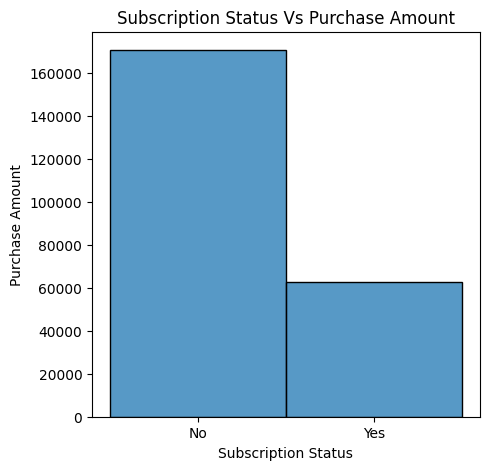

In [32]:
#create a plot to visualize the Purchase Amount by Subscription Status
plt.figure(figsize=(5,5)) #set the figure size  to 5*5 inches
sns.histplot(x=sub.index, weights=sub.values) #histogram with density estimation
plt.title('Subscription Status Vs Purchase Amount') #setting the title of the plot
plt.xlabel('Subscription Status') #lable for the x-axis
plt.ylabel('Purchase Amount') #lable for the y-axis
plt.show() #display the plot

Non-subscribed customers tend to spend more than subscribers. Offering exclusive discounts or benefits can encourage more customers to subscribe.

***Insights and Decisions from Data Analysis:***



1.   Enhance marketing strategies based on age group:Customers aged 30–50 are the highest spenders. Focused promotions and targeted campaigns can help maximize engagement and sales within this group.

2.   Leverage seasonal trends:
     Spending behavior varies by season, with spring and summer showing higher purchase amounts. Intensifying promotional efforts during these seasons can boost revenue.


3.   Promote subscription services:Non-subscribed customers tend to spend more than subscribers. Offering exclusive discounts or benefits can encourage more customers to subscribe.

4.   Focus on popular product categories:Clothing is the most purchased category. Expanding the product range or introducing special deals in this category can drive further sales.



5.  Address negative customer reviews:Customers providing ratings below 3 represent an opportunity for improvement. Collecting their feedback can help enhance product quality and overall customer satisfaction.

6.   Optimize shipping strategies:Free shipping is a popular choice among customers. Continuing to offer this option while improving delivery speed can attract more buyers.







